# 1. Import Packages

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

or the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [14]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

19208


See **functions** in the repository for [AnalysisTool_Chromatin](../../functions/README.md)

In [1]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

In [5]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42

plt.rc('font', family='serif')
plt.rc('font', serif='Arial')


# Other required plotting parameters
_dpi = 300
_font_size = 7.5
_page_width = 5.5



# 1. Define output folder

In [6]:
output_main_folder = r'L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH'
output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')


Use existing analysis folder: L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH\analysis.
Use existing figure folder: L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH\figures.


# 2. Load path for selected DAPI images

See the notebook below for **selected_dapi_image_fnames.pkl**:

[1_crop_nucleus_size_cellpose_inspect_and_select_cells](1_crop_nucleus_size_cellpose_inspect_and_select_cells.ipynb)

In [7]:
import pickle

cellsave_dictfname = os.path.join(output_analysis_folder,'selected_dapi_image_fnames.pkl')

selected_cell_fname_dict = pickle.load(open(cellsave_dictfname,'rb'))
selected_cell_fname_dict

{'L5 ET': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-118\\Nucleus_fov-118_cell-29.npy',
 'L5 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-177\\Nucleus_fov-177_cell-51.npy',
 'L4/5 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-15\\Nucleus_fov-15_cell-48.npy',
 'L2/3 IT': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0402_from_0329_v2\\FOV-86\\Nucleus_fov-86_cell-71.npy',
 'Pvalb': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-112\\Nucleus_fov-112_cell-69.npy',
 'Astro': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-9\\Nucleus_fov-9_cell-30.npy',
 'Oligo': '\\\\10.245.74.158\\Chromatin_NAS_8\\Analyzed_data\\MOp_dapi_segmentations\\exp0713_from_0418_v2\\FOV-99\\Nucleu

# 3. Plot cells individually

In [11]:
plot_cell_order= ['Endo','Oligo','Astro', 'L4/5 IT','L2/3 IT','Pvalb', 'L5 IT', 'L5 ET']

In [12]:
selected_cell_fname_dict.keys()

dict_keys(['L5 ET', 'L5 IT', 'L4/5 IT', 'L2/3 IT', 'Pvalb', 'Astro', 'Oligo', 'Endo'])

meta NOT subset; don't know how to subset; dropped


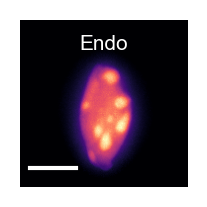

In [67]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 6000,42000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[:1]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


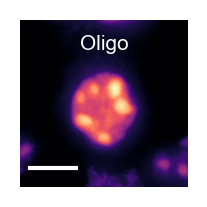

In [66]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 10000,50000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[1:2]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


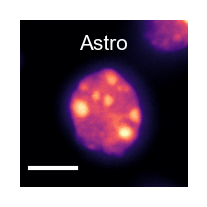

In [62]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 1300,7000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[2:3]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


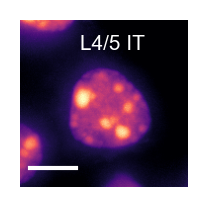

In [75]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 6500,40000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[3:4]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


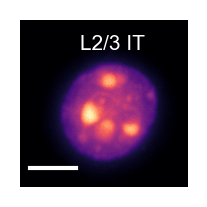

In [84]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 1000,8000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[4:5]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


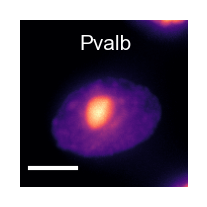

In [98]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 6500,45000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[5:6]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


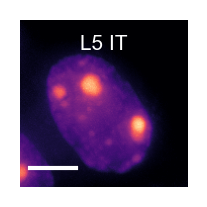

In [101]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 6000,40000
adjust_y = -0
adjust_x = -10

for _celltype in plot_cell_order[6:7]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)

meta NOT subset; don't know how to subset; dropped


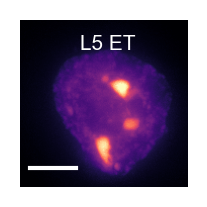

In [107]:
%matplotlib inline

refBar_len = 5 # in um
vmin, vmax= 2000,30000
adjust_y = -0
adjust_x = -0

for _celltype in plot_cell_order[7:]:
    _save_filename = selected_cell_fname_dict[_celltype]
    #if os.path.exists(_cell_fname):
    im_feature = np.load(_save_filename)
    dna_im = im_feature[-1]
    dna_im = dna_im[15+adjust_x:-15+adjust_x,15+adjust_y:-15+adjust_y]
    fig,ax =plt.subplots(1,1, figsize = (_page_width/5,(_page_width/5)),dpi=200)
    ax.imshow(dna_im, cmap='magma', 
              vmin=vmin, vmax=vmax,
             )
    
    # start coordinate for colorbar
    _bar_starts = np.array([10,150
                            ]) 
    # therefore, end of colorbar
    _bar_ends = np.array([10+ (refBar_len*1000/108),150
                            ]) 
    #print(_bar_starts, _bar_ends)
    _ref_line = ax.plot([_bar_starts[0], _bar_ends[0]],
                          [_bar_starts[1], _bar_ends[1]], 
                          color='white', 
                          linewidth=1.5)
    
    ax.text(60, 30, f'{_celltype}', fontsize=_font_size, c='white')
    plt.axis('off')
    
    cellname = _save_filename.split(f'Nucleus_')[1].split('.npy')[0]
    #plt.title(f'{cellname}, {_celltype}')
    _celltype = _celltype.replace('/','_').replace(' ','_')
    fig_basename = f'DAPI_{cellname}_{_celltype}'
    # save pdf and png
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".pdf"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)
    fig.savefig(os.path.join(output_figure_folder, fig_basename+".png"),
                transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)